## Introduction

This project scrapes the data from an [article by Pat Cortland](https://www.considerable.com/money/planning/what-is-middle-class-in-every-state/) which explores middle class income ranges for US states based on Pew Research Center's data from their 2016 American Community Survey.

For the purpose of this project, the following steps are completed:
* Step 1 - gather data from the article
* Step 2 - visualize differences between states and groups



### Import Modules

In [1]:
import requests
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Gather Data

In [2]:
url = "https://www.considerable.com/money/planning/what-is-middle-class-in-every-state/"
html = requests.get(url).content
df_list = pd.read_html(html)

In [3]:
print(df_list)

[                       0                  1                   2  \
0                  State             Single              Couple   
1           U.S. average  $26,093 – $78,280  $36,902 – $110,705   
2                Alabama  $22,597 – $67,791   $31,957 – $95,870   
3                 Alaska  $27,502 – $82,507  $38,894 – $116,683   
4                Arizona  $25,024 – $75,071  $35,389 – $106,166   
5               Arkansas  $22,675 – $68,025   $32,067 – $96,202   
6             California  $29,851 – $89,552  $42,215 – $126,646   
7               Colorado  $26,876 – $80,629  $38,009 – $114,026   
8            Connecticut  $28,364 – $85,091  $40,112 – $120,336   
9               Delaware  $26,146 – $78,437  $36,975 – $110,926   
10  District of Columbia  $30,242 – $90,727  $42,769 – $128,307   
11               Florida  $26,015 – $78,045  $36,791 – $110,373   
12               Georgia  $24,032 – $72,096  $33,986 – $101,959   
13                Hawaii  $30,895 – $92,684  $43,692 – $131,0

In [4]:
df = df_list[-1]

In [5]:
df.to_csv('middle_class_income_ranges.csv')

### Load & Examine Data

In [6]:
income_ranges = pd.read_csv('middle_class_income_ranges.csv')

In [7]:
print(income_ranges.head())

   Unnamed: 0             0                  1                   2  \
0           0         State             Single              Couple   
1           1  U.S. average  $26,093 – $78,280  $36,902 – $110,705   
2           2       Alabama  $22,597 – $67,791   $31,957 – $95,870   
3           3        Alaska  $27,502 – $82,507  $38,894 – $116,683   
4           4       Arizona  $25,024 – $75,071  $35,389 – $106,166   

                    3  
0      Family of four  
1  $52,187 – $156,560  
2  $45,194 – $135,581  
3  $55,005 – $165,015  
4  $50,047 – $150,141  


In [8]:
# update the column names
header = income_ranges.iloc[0]
income_ranges = income_ranges[1:]
income_ranges.columns = header

In [9]:
print(income_ranges.head())

0  0         State             Single              Couple      Family of four
1  1  U.S. average  $26,093 – $78,280  $36,902 – $110,705  $52,187 – $156,560
2  2       Alabama  $22,597 – $67,791   $31,957 – $95,870  $45,194 – $135,581
3  3        Alaska  $27,502 – $82,507  $38,894 – $116,683  $55,005 – $165,015
4  4       Arizona  $25,024 – $75,071  $35,389 – $106,166  $50,047 – $150,141
5  5      Arkansas  $22,675 – $68,025   $32,067 – $96,202  $45,350 – $136,051


In [10]:
income_ranges.shape

(52, 5)

In [11]:
income_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 5 columns):
0                 52 non-null int64
State             52 non-null object
Single            52 non-null object
Couple            52 non-null object
Family of four    52 non-null object
dtypes: int64(1), object(4)
memory usage: 2.2+ KB


### Prepare Data

In [12]:
# split income columns for each group
single = income_ranges['Single'].str.split('–', n=1, expand=True)
couple = income_ranges['Couple'].str.split(' – ', n=1, expand=True)
family = income_ranges['Family of four'].str.split(' – ', n=1, expand=True)

In [13]:
# split income ranges into high and low columns
income_ranges['Single_Lower'] = single[0]
income_ranges['Single_Higher'] = single[1]

income_ranges['Couple_Lower'] = couple[0]
income_ranges['Couple_Higher'] = couple[1]

income_ranges['Family_Lower'] = family[0]
income_ranges['Family_Higher'] = family[1]

In [14]:
# drop old columns
income_ranges.drop(columns=['Single'], inplace=True)
income_ranges.drop(columns=['Couple'], inplace=True)
income_ranges.drop(columns=['Family of four'], inplace=True)

In [15]:
print(income_ranges.head())

0  0         State Single_Lower Single_Higher Couple_Lower Couple_Higher  \
1  1  U.S. average     $26,093        $78,280      $36,902      $110,705   
2  2       Alabama     $22,597        $67,791      $31,957       $95,870   
3  3        Alaska     $27,502        $82,507      $38,894      $116,683   
4  4       Arizona     $25,024        $75,071      $35,389      $106,166   
5  5      Arkansas     $22,675        $68,025      $32,067       $96,202   

0 Family_Lower Family_Higher  
1      $52,187      $156,560  
2      $45,194      $135,581  
3      $55,005      $165,015  
4      $50,047      $150,141  
5      $45,350      $136,051  


In [16]:
# convert income columns to ints
income_ranges[income_ranges.columns[2:]] = income_ranges[income_ranges.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [17]:
income_ranges.head()

,0,State,Single_Lower,Single_Higher,Couple_Lower,Couple_Higher,Family_Lower,Family_Higher
1,1,U.S. average,26093,78280,36902,110705,52187,156560
2,2,Alabama,22597,67791,31957,95870,45194,135581
3,3,Alaska,27502,82507,38894,116683,55005,165015
4,4,Arizona,25024,75071,35389,106166,50047,150141
5,5,Arkansas,22675,68025,32067,96202,45350,136051


### Vizualize Data

In [18]:
# reorder values
ordered = income_ranges.sort_values(by='Single_Lower')

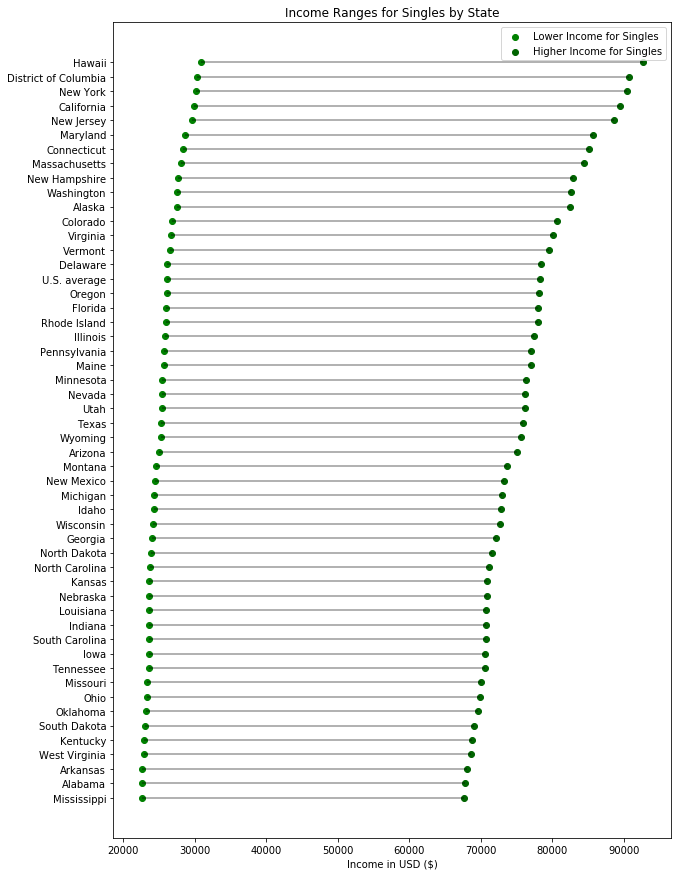

In [19]:
# income ranges for singles by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Single_Lower'],
          xmax=ordered['Single_Higher'],
          color='black',
          alpha=0.4)
plt.scatter(ordered['Single_Lower'], 
            ordered['State'], 
            color='green', 
            alpha=1, 
            label='Lower Income for Singles')
plt.scatter(ordered['Single_Higher'], 
            ordered['State'], 
            color='darkgreen', 
            alpha=1, 
            label='Higher Income for Singles')
plt.legend()
plt.title('Income Ranges for Singles by State')
plt.xlabel('Income in USD ($)');

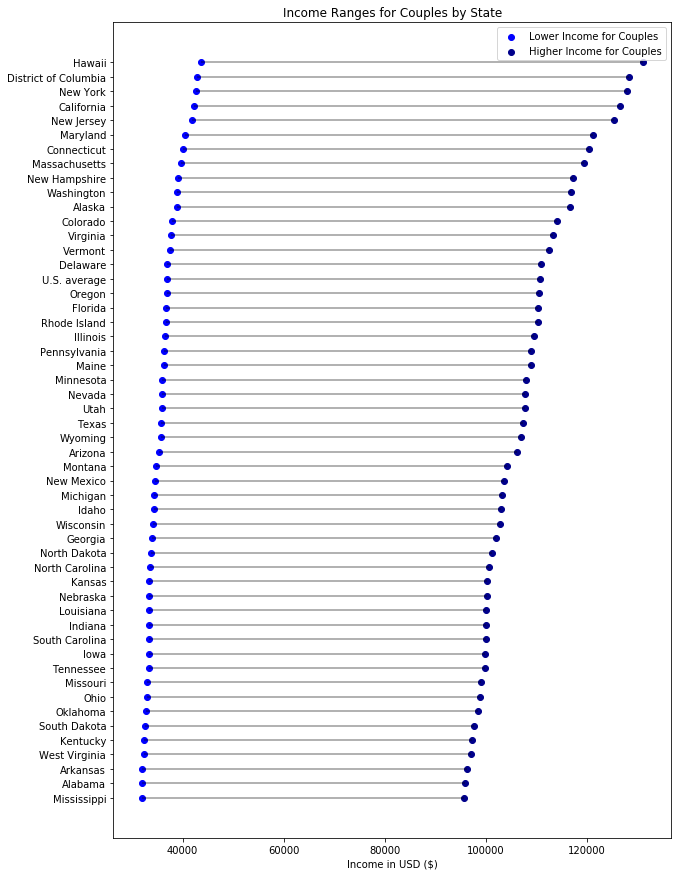

In [20]:
# income ranges for couples by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Couple_Lower'],
          xmax=ordered['Couple_Higher'],
          color='black',
          alpha=0.4)
plt.scatter(ordered['Couple_Lower'], 
            ordered['State'], 
            color='blue', 
            alpha=1, 
            label='Lower Income for Couples')
plt.scatter(ordered['Couple_Higher'], 
            ordered['State'], 
            color='darkblue', 
            alpha=1, 
            label='Higher Income for Couples')
plt.legend()
plt.title('Income Ranges for Couples by State')
plt.xlabel('Income in USD ($)');

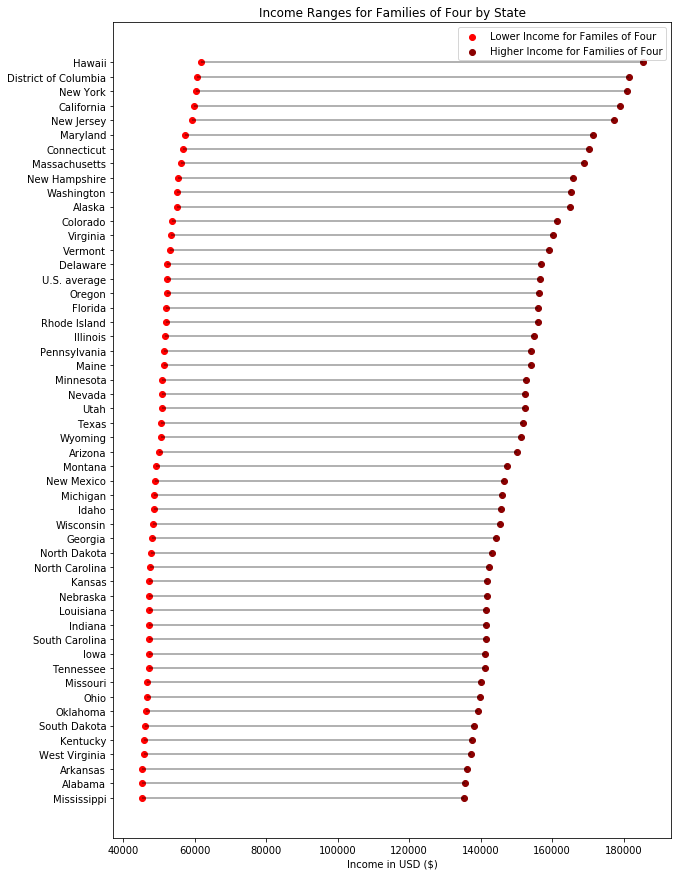

In [21]:
# income ranges for familes of four by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Family_Lower'],
          xmax=ordered['Family_Higher'],
          color='black',
          alpha=0.4)
plt.scatter(ordered['Family_Lower'], 
            ordered['State'], 
            color='red', 
            alpha=1, 
            label='Lower Income for Familes of Four')
plt.scatter(ordered['Family_Higher'], 
            ordered['State'], 
            color='darkred', 
            alpha=1, 
            label='Higher Income for Families of Four')
plt.legend()
plt.title('Income Ranges for Families of Four by State')
plt.xlabel('Income in USD ($)');

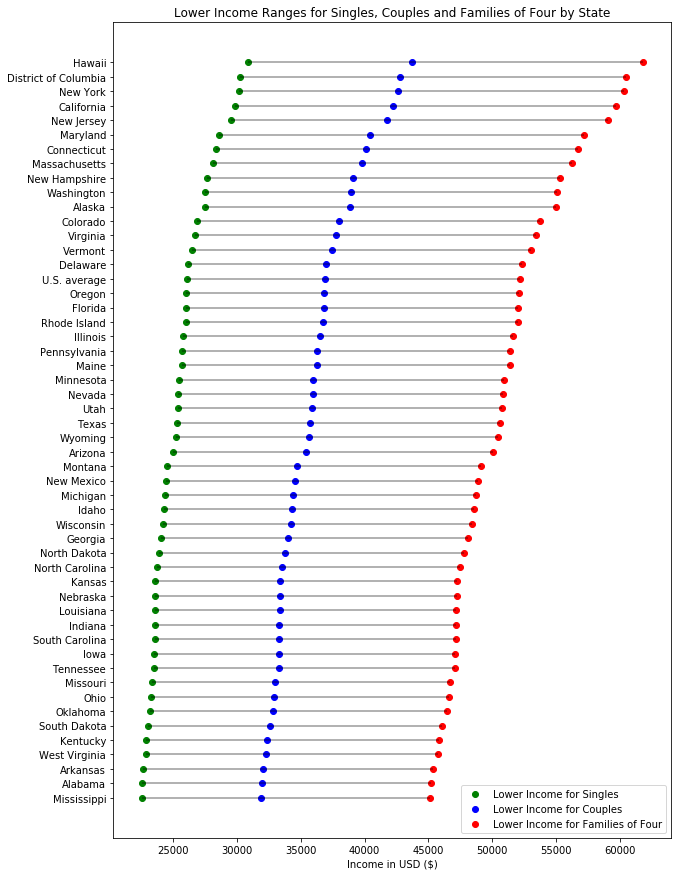

In [22]:
# income ranges for lower ranges by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Single_Lower'],
          xmax=ordered['Family_Lower'],
          color='black',
          alpha=0.4)
plt.scatter(ordered['Single_Lower'], 
            ordered['State'], 
            color='green', 
            alpha=1, 
            label='Lower Income for Singles')
plt.scatter(ordered['Couple_Lower'], 
            ordered['State'], 
            color='blue', 
            alpha=1, 
            label='Lower Income for Couples')
plt.scatter(ordered['Family_Lower'], 
            ordered['State'], 
            color='red', 
            alpha=1, 
            label='Lower Income for Families of Four')
plt.legend()
plt.title('Lower Income Ranges for Singles, Couples and Families of Four by State')
plt.xlabel('Income in USD ($)');

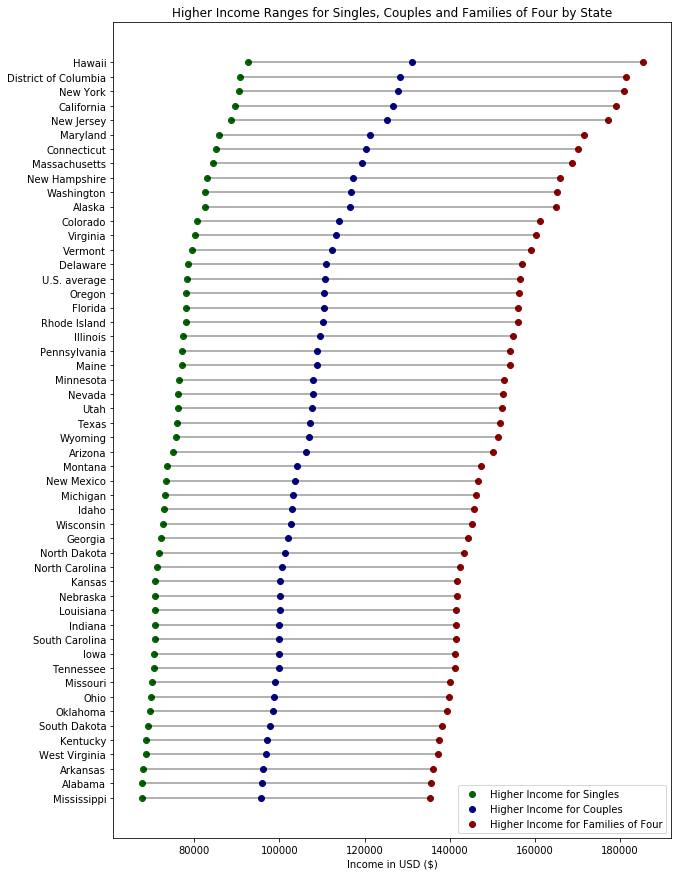

In [23]:
# income ranges for upper ranges by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Single_Higher'],
          xmax=ordered['Family_Higher'],
          color='black',
          alpha=0.4)
plt.scatter(ordered['Single_Higher'], 
            ordered['State'], 
            color='darkgreen', 
            alpha=1, 
            label='Higher Income for Singles')
plt.scatter(ordered['Couple_Higher'], 
            ordered['State'], 
            color='darkblue', 
            alpha=1, 
            label='Higher Income for Couples')
plt.scatter(ordered['Family_Higher'], 
            ordered['State'], 
            color='darkred', 
            alpha=1, 
            label='Higher Income for Families of Four')
plt.legend()
plt.title('Higher Income Ranges for Singles, Couples and Families of Four by State')
plt.xlabel('Income in USD ($)');

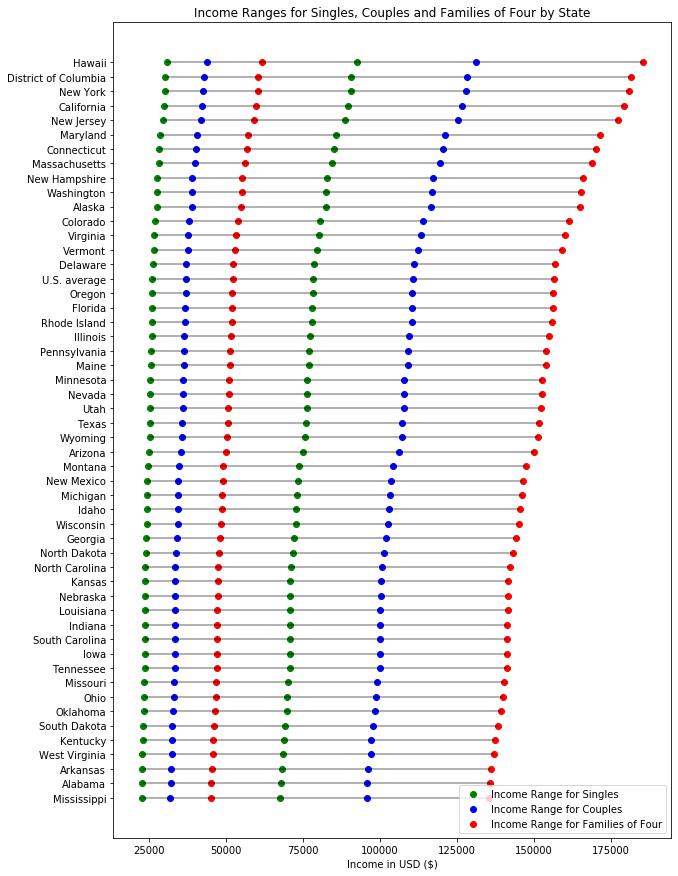

In [24]:
# income ranges for all ranges by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Single_Lower'],
          xmax=ordered['Family_Higher'],
          color='black',
          alpha=0.4)
# income ranges for singles
plt.scatter(ordered['Single_Lower'], 
            ordered['State'], 
            color='green', 
            alpha=1)
plt.scatter(ordered['Single_Higher'], 
            ordered['State'], 
            color='green', 
            alpha=1, 
            label='Income Range for Singles')
# income ranges for couples
plt.scatter(ordered['Couple_Lower'], 
            ordered['State'], 
            color='blue', 
            alpha=1)
plt.scatter(ordered['Couple_Higher'], 
            ordered['State'], 
            color='blue', 
            alpha=1, 
            label='Income Range for Couples')
# income ranges for families of four
plt.scatter(ordered['Family_Lower'], 
            ordered['State'], 
            color='red', 
            alpha=1)
plt.scatter(ordered['Family_Higher'], 
            ordered['State'], 
            color='red', 
            alpha=1, 
            label='Income Range for Families of Four')
plt.legend()
plt.title('Income Ranges for Singles, Couples and Families of Four by State')
plt.xlabel('Income in USD ($)');

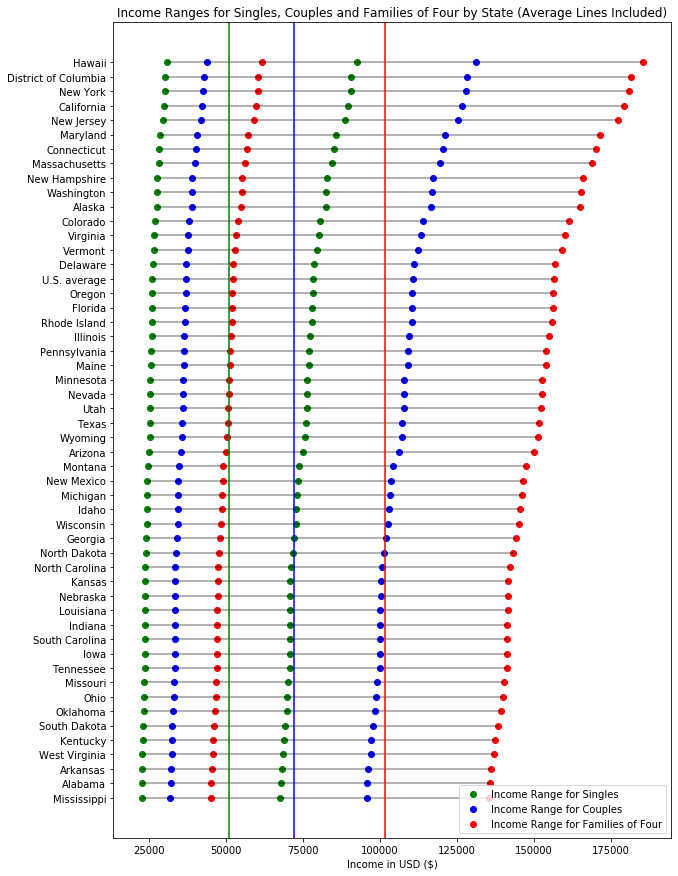

In [25]:
# with average lines for each range

# income ranges for all ranges by state
fig = plt.subplots(figsize=(10,15))
plt.hlines(y=ordered['State'],
          xmin=ordered['Single_Lower'],
          xmax=ordered['Family_Higher'],
          color='black',
          alpha=0.4)
# income ranges for singles
plt.scatter(ordered['Single_Lower'], 
            ordered['State'], 
            color='green', 
            alpha=1)
plt.scatter(ordered['Single_Higher'], 
            ordered['State'], 
            color='green', 
            alpha=1, 
            label='Income Range for Singles')
# income ranges for couples
plt.scatter(ordered['Couple_Lower'], 
            ordered['State'], 
            color='blue', 
            alpha=1)
plt.scatter(ordered['Couple_Higher'], 
            ordered['State'], 
            color='blue', 
            alpha=1, 
            label='Income Range for Couples')
# income ranges for families of four
plt.scatter(ordered['Family_Lower'], 
            ordered['State'], 
            color='red', 
            alpha=1)
plt.scatter(ordered['Family_Higher'], 
            ordered['State'], 
            color='red', 
            alpha=1, 
            label='Income Range for Families of Four')

# Singles
ordered['Single_Diff']=(ordered['Single_Higher']-ordered['Single_Lower'])
plt.axvline(ordered['Single_Diff'].mean(),color='green')

# Couples
ordered['Couple_Diff']=(ordered['Couple_Higher']-ordered['Couple_Lower'])
plt.axvline(ordered['Couple_Diff'].mean(),color='blue')

# Families
ordered['Family_Diff']=(ordered['Family_Higher']-ordered['Family_Lower'])
plt.axvline(ordered['Family_Diff'].mean(),color='red')


plt.legend()
plt.title('Income Ranges for Singles, Couples and Families of Four by State (Average Lines Included)')
plt.xlabel('Income in USD ($)');